In [242]:
import pandas as pd
import numpy as np

## Import Data

In [243]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Cleansing Data

In [288]:
df_1 = hotel[:5000]

In [289]:
df_1.shape

(5000, 32)

In [290]:
df = df_1[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [291]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [292]:
df.shape

(5000, 16)

## EDA

In [249]:
import seaborn as sns
import matplotlib as plt

* distribusi

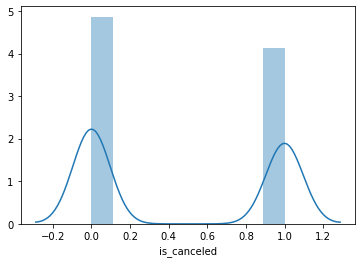

In [250]:
sns.distplot(df['is_canceled'])

In [251]:
df['is_canceled'].value_counts()

0    2702
1    2298
Name: is_canceled, dtype: int64

In [252]:
df['label'] =['yes' if i==1 else 'no' for i in df['is_canceled']]

In [253]:
df['label']

0        no
1        no
2        no
3        no
4        no
       ... 
4995    yes
4996    yes
4997    yes
4998    yes
4999    yes
Name: label, Length: 5000, dtype: object

menambahkan fitur label (bentuk string dari is_canceled) agar lebih mudah dalam membuat EDA

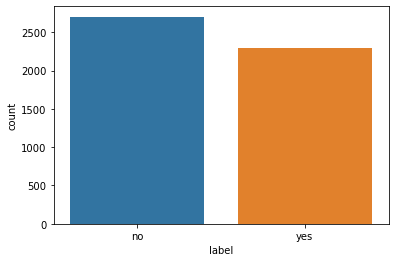

In [254]:
sns.countplot(x= 'label', data=df)

data pengunjung yang membatalkan kunjungan dan tidak membatalkan tidak terlalu jauh perbedaanya

### Consumer Profiling

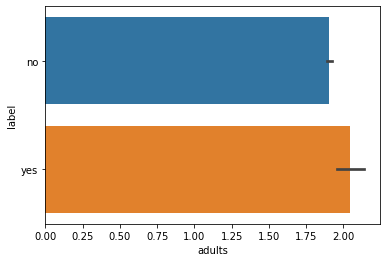

In [255]:
sns.barplot(x='adults', y='label', data=df )

pengunjung dewasa dengan jumlah orang lebih banyak cenderung ebih banyak membatalkan kunjungan

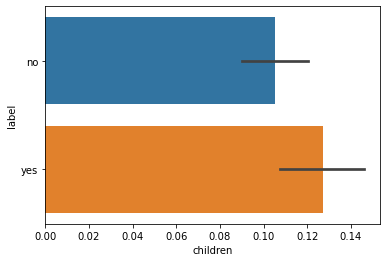

In [256]:
sns.barplot(x='children', y='label', data=df )

sama dengan pengunjung dewasa, semakin banyak pengunjung anak memiliki kecenderungan untuk membatalkan kunjungan

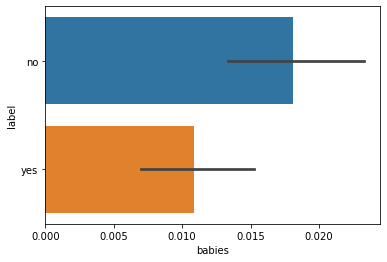

In [257]:
sns.barplot(x='babies', y='label', data=df )

berbeda dengan pengunjung dewasa dan anak, pengunjung bayi memiliki kecenderungan tidak membatalkan kunjungan

insight = Pengunjung dewasa dan membawa anak-anak memiliki kecenderungan untuk membatalkan kunjungan, semetara Pengunjung yang membawa bayi memiliki kecenderungan untuk tetap datang

### Consumer Behavior

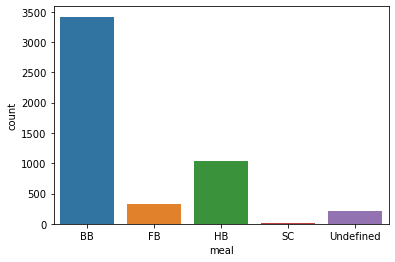

In [258]:
sns.countplot(x='meal', data=df )

BB merupakan jenis makanan yang dipesan (bed and breakfast)

In [259]:
df['country'].value_counts().head(5)

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
Name: country, dtype: int64

PRT merupakan asal negara pengunjung terbanyak

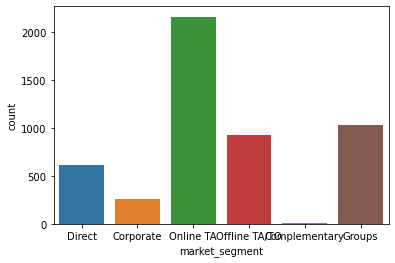

In [260]:
sns.countplot(x='market_segment', data=df )

online TA merupakan segemen pasar terbesar

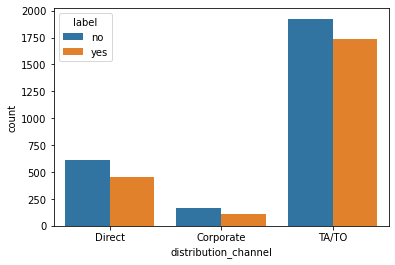

In [261]:
sns.countplot(x='distribution_channel', hue='label', data=df )

TA/TO merupakan jalur distribus yang paling banyak, tetapi lewat julur itu pula banyak pengunjung yang membatakan kunjungannya

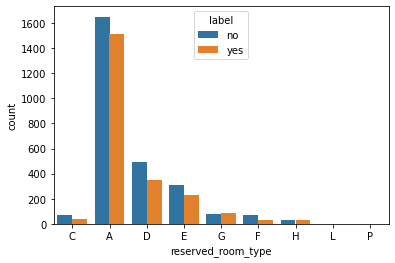

In [262]:
sns.countplot(x='reserved_room_type', hue='label', data=df )

tipe kamar A merupakan tipe kamar yang paling disukai, sekaligus paling sering menerima pembatalan kunjungan

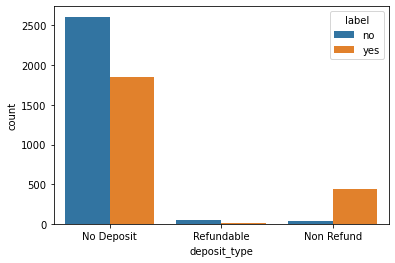

In [263]:
sns.countplot(x='deposit_type', hue='label', data=df )

pengunjung yang tidak memiliki deposit cenderung membatalkan kunjungan, karena merasa tidak ada ikatan terhadap hotel

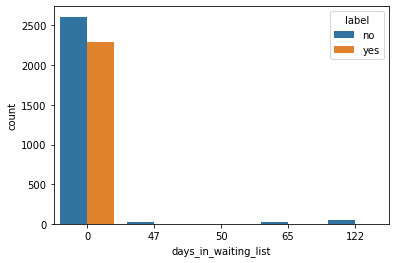

In [264]:
sns.countplot(x='days_in_waiting_list', hue='label', data=df )

pengunjung yang tidak melakukan booking dengan waktu yg lama cenderung melakukan pembatalan kunjungan

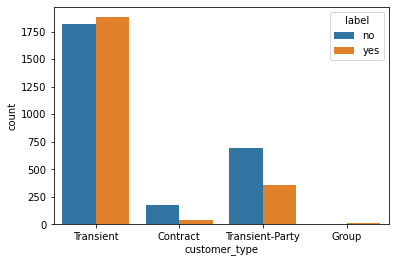

In [265]:
sns.countplot(x='customer_type', hue='label', data=df )

transient merupakan tipe pengunjung terbanyak, tetapi transient juga yang merupakan jenis ppengunjung yg sering membatalkan kunjungan

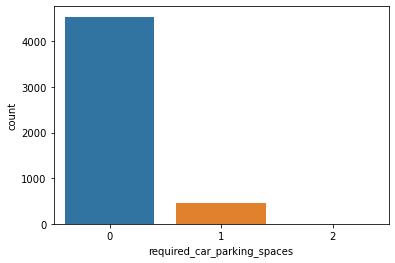

In [266]:
sns.countplot(x='required_car_parking_spaces', data=df )

diketahui bahwa banyak dari pengujnjung tidak terlalu membutuhkan lahan parkir

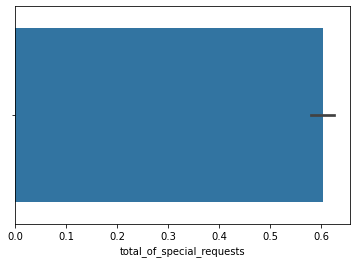

In [267]:
sns.barplot(x='total_of_special_requests', data=df )

In [268]:
df['total_of_special_requests'].value_counts().head(5)

0    2943
1    1239
2     690
3     121
4       7
Name: total_of_special_requests, dtype: int64